In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data_visualization.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Individuals,Microsatellite PSA (39),Microsatellite PSA (223),Microsatellite Jaccard (39),Microsatellite Jaccard (223),SNP Cosine (39),Expert evaluation (1÷5)
0,T17,83.333333,75.000000,83.928571,76.666667,96.731468,4
1,T18,83.333333,91.666667,89.523810,87.619048,96.432386,4
2,T26,91.666667,91.666667,92.857143,84.822695,97.859432,3
3,T50,83.333333,83.333333,89.067055,80.000000,96.863918,3
4,T52,83.333333,83.333333,89.067055,78.297872,97.718436,4


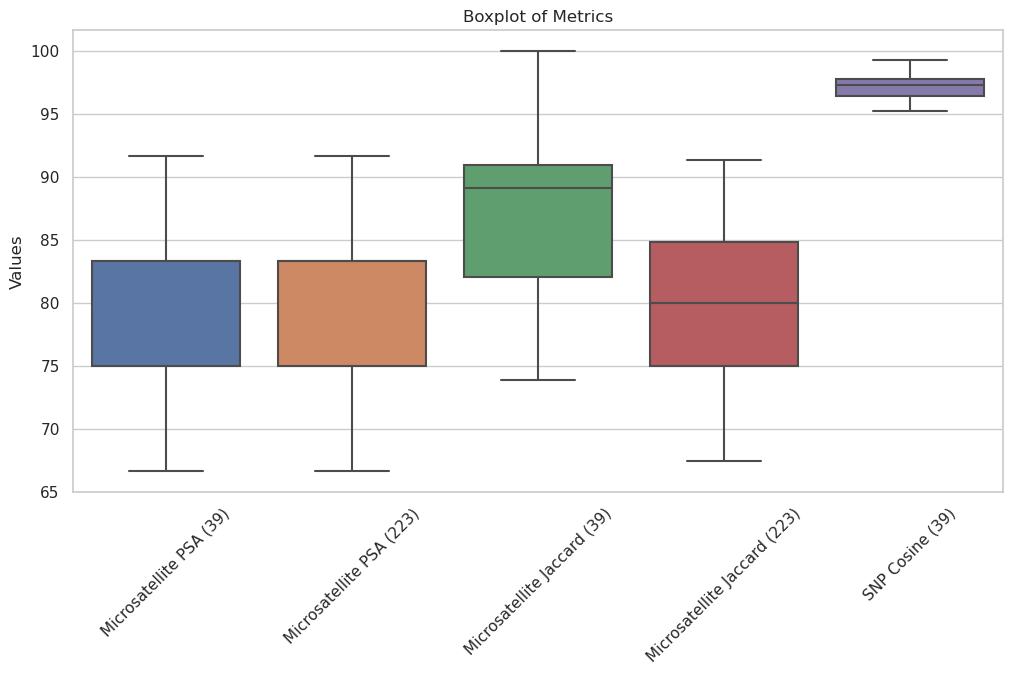

In [17]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create box plots for each of the numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=["Individuals","Expert evaluation (1÷5)"]))
plt.title("Boxplot of Metrics")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

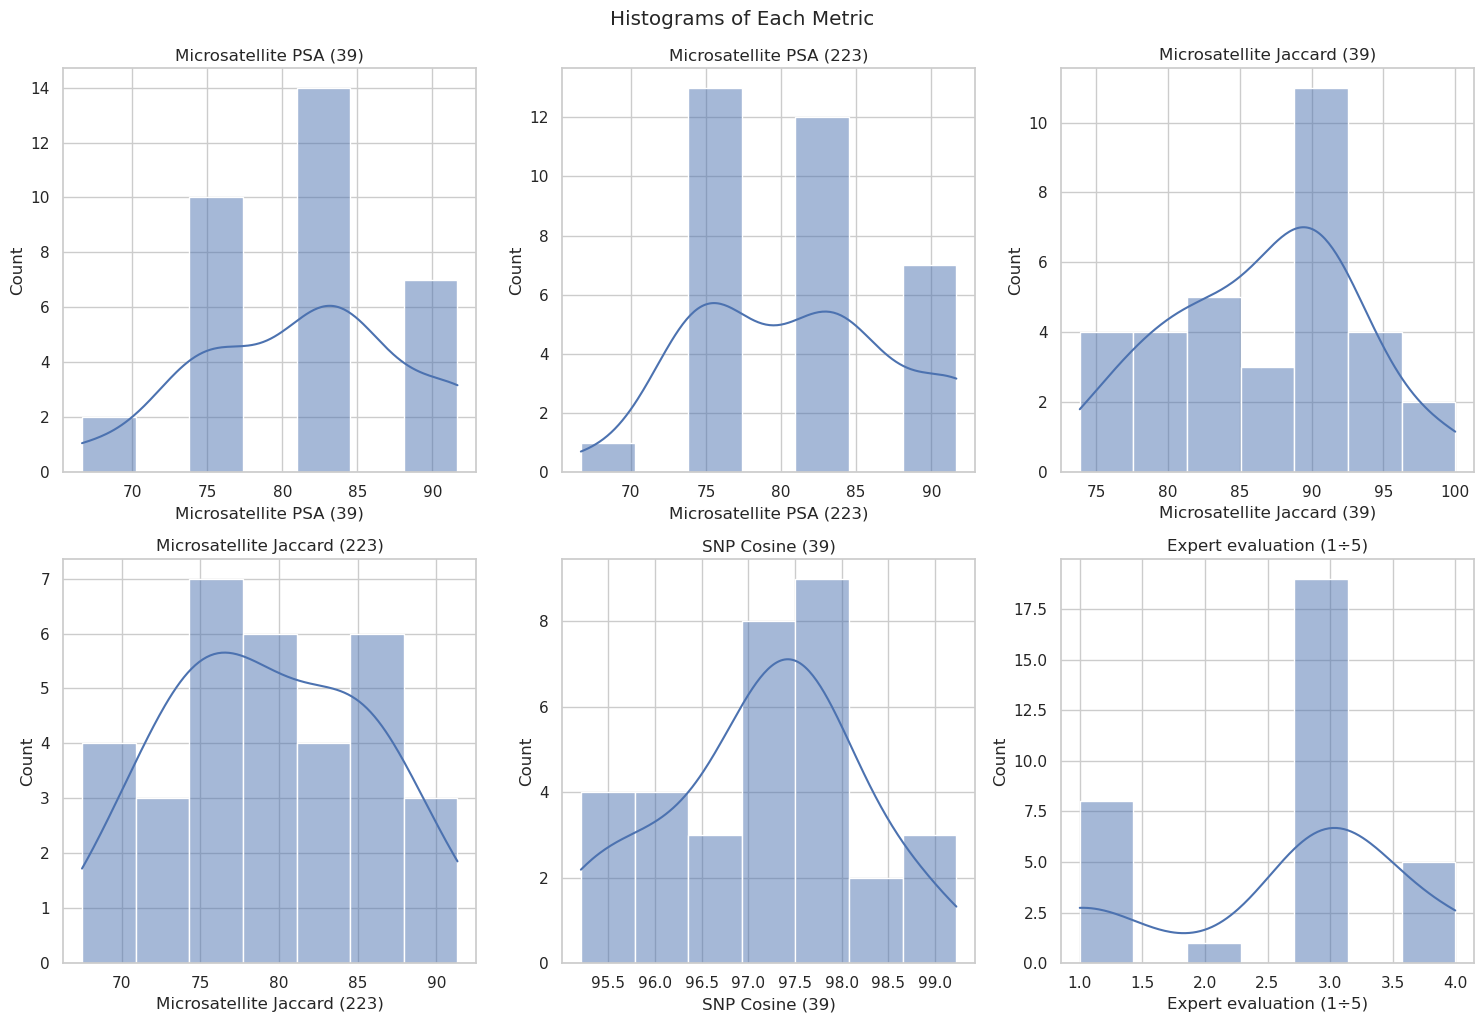

In [19]:
# Creating histograms for each metric

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# List of metrics
metrics = data.columns[1:]

# Plot histograms
for i, ax in enumerate(axes.flatten()):
    if i < len(metrics):
        sns.histplot(data[metrics[i]], ax=ax, kde=True)
        ax.set_title(metrics[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.suptitle("Histograms of Each Metric", y=1.02)
plt.show()


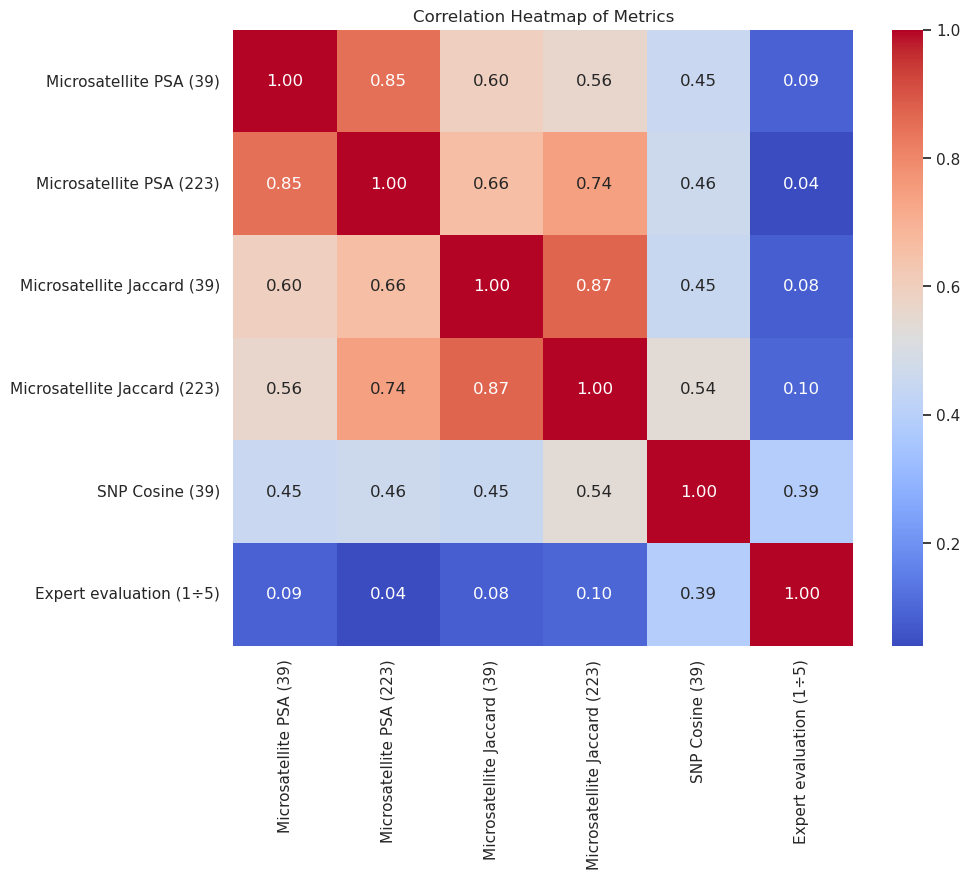

In [20]:
# Calculate the correlation matrix
correlation_matrix = data.drop(columns=["Individuals"]).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Metrics")
plt.show()


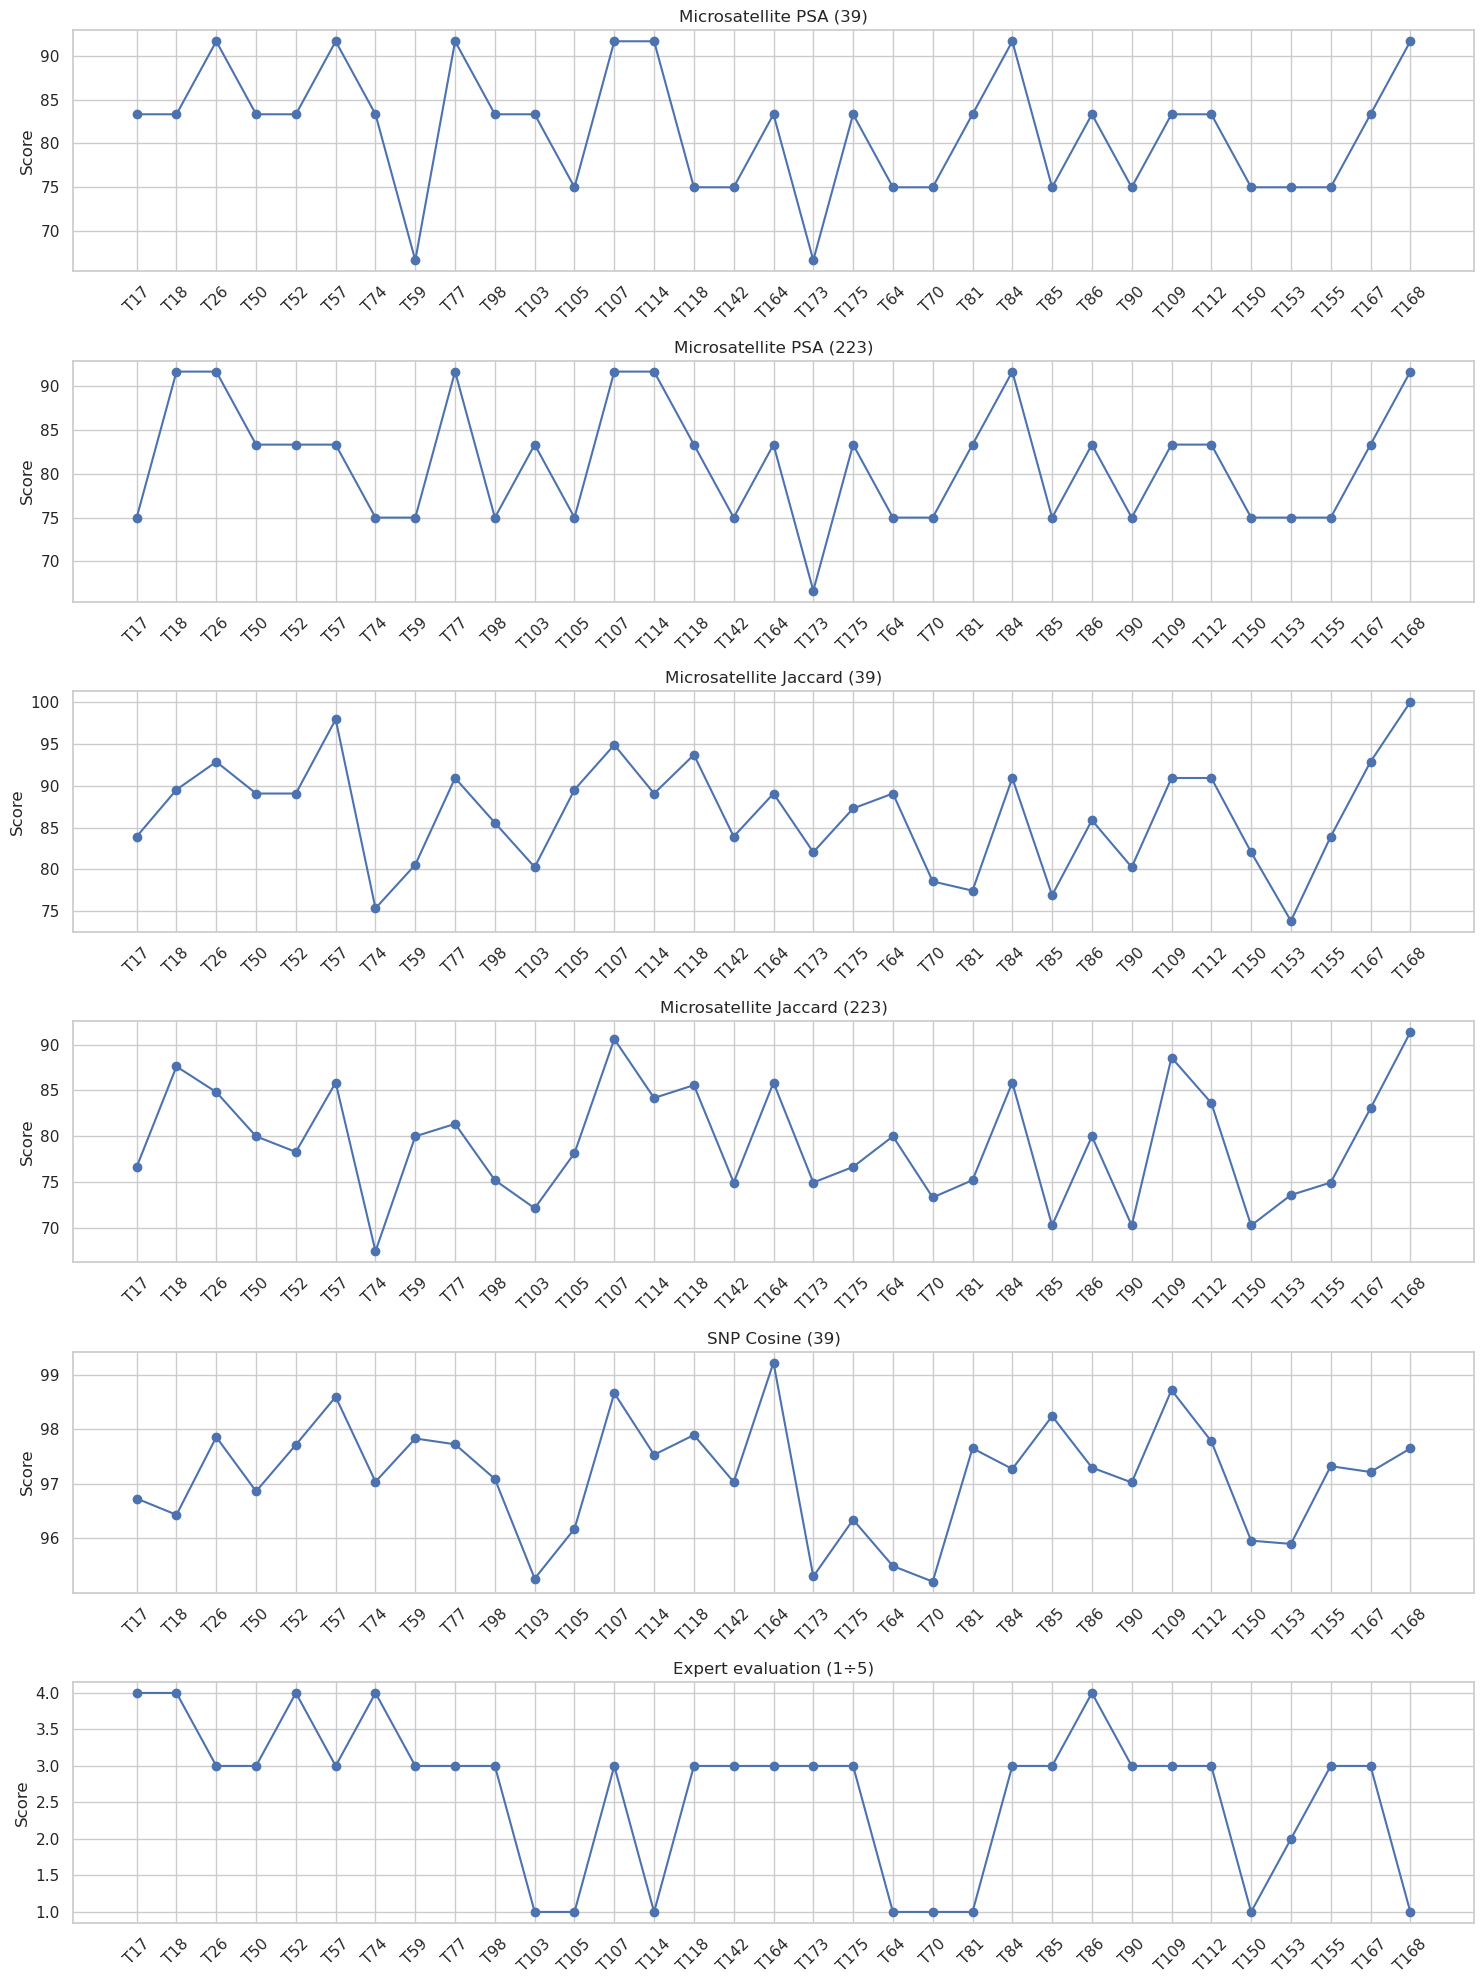

In [21]:
# Extracting individual columns for plotting
columns_to_plot = data.columns[1:]

# Adjusting the figure size for better visibility of x-axis labels
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(15, 20))

for i, col in enumerate(columns_to_plot):
    axs[i].plot(data['Individuals'], data[col], marker='o')
    axs[i].set_title(col)
    axs[i].set_ylabel('Score')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.tight_layout()
plt.show()
